In [47]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math

In [4]:
df_titanic = pd.read_csv("titanic.csv", na_values="?")

df_titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3,0,Mahon Miss. Bridget Delia,female,NaN,0,0,330924,7.8792,NaN,Q,NaN,NaN,NaN
1,1,0,Clifford Mr. George Quincy,male,NaN,0,0,110465,52.0000,A14,S,NaN,NaN,Stoughton MA
2,3,0,Yasbeck Mr. Antoni,male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
3,3,1,Tenglin Mr. Gunnar Isidor,male,25.0,0,0,350033,7.7958,NaN,S,13 15,NaN,NaN
4,3,0,Kelly Mr. James,male,34.5,0,0,330911,7.8292,NaN,Q,NaN,70.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,Rice Master. Eugene,male,2.0,4,1,382652,29.1250,NaN,Q,NaN,NaN,NaN
1305,3,0,Dika Mr. Mirko,male,17.0,0,0,349232,7.8958,NaN,S,NaN,NaN,NaN
1306,3,0,Palsson Miss. Torborg Danira,female,8.0,3,1,349909,21.0750,NaN,S,NaN,NaN,NaN
1307,1,0,Widener Mr. George Dunton,male,50.0,1,1,113503,211.5000,C80,C,NaN,NaN,Elkins Park PA


In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  746 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
df_titanic['age'].unique()

array([  nan, 27.  , 25.  , 34.5 , 18.  , 58.  , 31.  , 11.  , 44.  ,
       63.  , 26.  , 30.  , 51.  , 24.  , 41.  ,  1.  ,  7.  , 20.  ,
       54.  , 45.5 , 14.5 ,  2.  , 39.  , 45.  ,  8.  , 29.  ,  0.92,
       16.  , 35.  , 46.  , 37.  , 42.  , 32.  , 36.  , 28.  , 19.  ,
       33.  , 50.  , 57.  , 21.  , 22.  , 43.  , 65.  , 17.  , 48.  ,
        4.  , 80.  , 24.5 , 61.  ,  6.  , 62.  , 13.  ,  0.83, 49.  ,
        0.67, 60.  , 76.  , 23.  , 12.  , 38.  , 64.  ,  9.  , 14.  ,
       56.  , 40.  , 53.  , 47.  , 71.  , 55.  , 34.  , 15.  ,  5.  ,
       52.  ,  3.  , 32.5 ,  0.75, 11.5 , 10.  , 18.5 , 28.5 , 74.  ,
       67.  , 40.5 ,  0.42, 70.  , 26.5 ,  0.17, 70.5 , 59.  , 38.5 ,
       55.5 , 20.5 , 60.5 , 66.  , 30.5 , 23.5 , 22.5 , 36.5 ,  0.33])

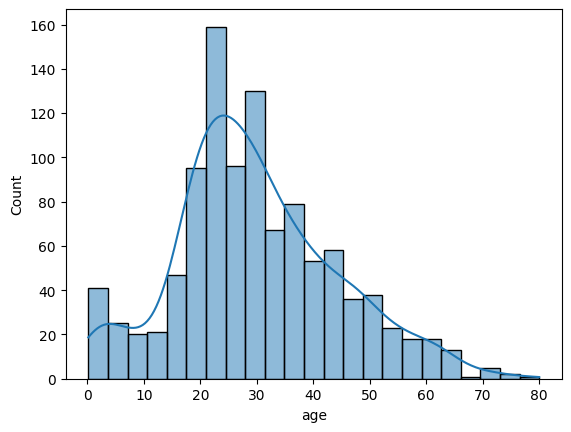

In [11]:
sns.histplot(data=df_titanic, x= 'age', kde = True);

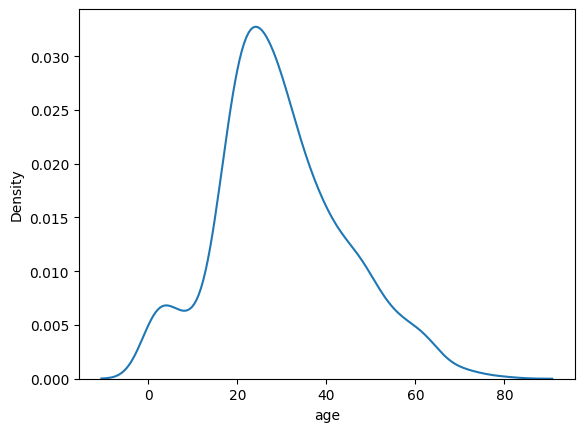

In [14]:
sns.kdeplot(data=df_titanic, x= 'age');

In [14]:
resultado_ber = scipy.stats.bernoulli.rvs(p=0.5, size = 1000) # variáveis aleatórias dist bernolli
pd.Series(resultado_ber).value_counts(normalize = True)

0    0.502
1    0.498
Name: proportion, dtype: float64

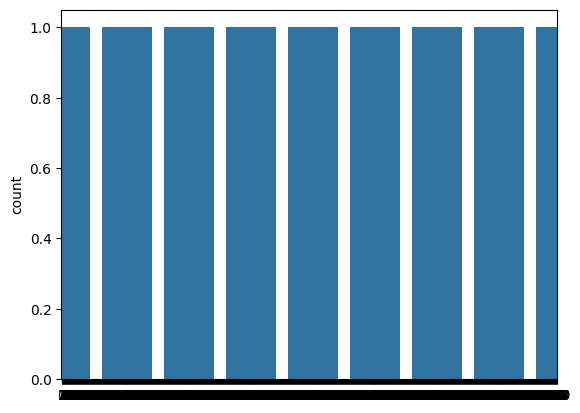

In [15]:
sns.countplot(resultado_ber);

<Axes: ylabel='Probability'>

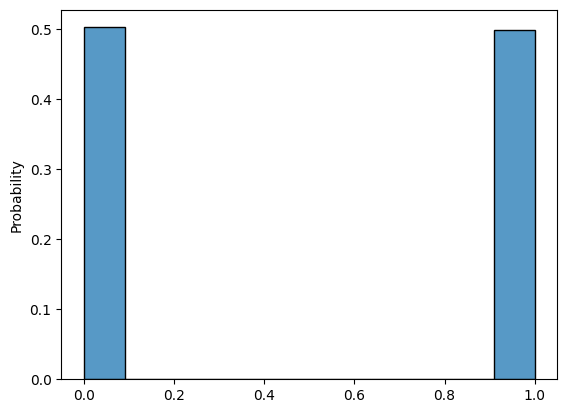

In [16]:
sns.histplot(resultado_ber, stat = 'probability')

In [17]:
df_titanic['survived'].mean()

np.float64(0.3819709702062643)

# exemplo do restaurante com poisson

20 pedidos por hora, qual a probablididade de, em alguma hora, haver 15 pedidos?

In [18]:
l = 20

In [36]:
k = 15

In [38]:
p_15 = (np.exp(-l) * (l**k)) / math.factorial(k)
f'{p_15 :.2%}'

'5.16%'

In [37]:
scipy.stats.poisson.pmf(k = k, mu = l)

np.float64(0.05164885353175814)

In [49]:
experimento = {
    'nº pedidos': [],
    'probabilidade': []
}

In [50]:
for i in range(46):
    experimento['nº pedidos'].append(i)
    experimento['probabilidade'].append(scipy.stats.poisson.pmf(k = i, mu = 20))
    

In [51]:
for i in range(46):
    print('Número de pedidos:', experimento['nº pedidos'][i], ' Probabilidade:',f"{experimento['probabilidade'][i]:.2%}")

Número de pedidos: 0  Probabilidade: 0.00%
Número de pedidos: 1  Probabilidade: 0.00%
Número de pedidos: 2  Probabilidade: 0.00%
Número de pedidos: 3  Probabilidade: 0.00%
Número de pedidos: 4  Probabilidade: 0.00%
Número de pedidos: 5  Probabilidade: 0.01%
Número de pedidos: 6  Probabilidade: 0.02%
Número de pedidos: 7  Probabilidade: 0.05%
Número de pedidos: 8  Probabilidade: 0.13%
Número de pedidos: 9  Probabilidade: 0.29%
Número de pedidos: 10  Probabilidade: 0.58%
Número de pedidos: 11  Probabilidade: 1.06%
Número de pedidos: 12  Probabilidade: 1.76%
Número de pedidos: 13  Probabilidade: 2.71%
Número de pedidos: 14  Probabilidade: 3.87%
Número de pedidos: 15  Probabilidade: 5.16%
Número de pedidos: 16  Probabilidade: 6.46%
Número de pedidos: 17  Probabilidade: 7.60%
Número de pedidos: 18  Probabilidade: 8.44%
Número de pedidos: 19  Probabilidade: 8.88%
Número de pedidos: 20  Probabilidade: 8.88%
Número de pedidos: 21  Probabilidade: 8.46%
Número de pedidos: 22  Probabilidade: 7.69

In [57]:
df_experimento = pd.DataFrame(experimento)
df_experimento['formatado'] = df_experimento['probabilidade'].apply(lambda x: f'{x:.9%}')
df_experimento

,nº pedidos,probabilidade,formatado
0,0,2.061154e-09,0.000000206%
1,1,4.122307e-08,0.000004122%
2,2,4.122307e-07,0.000041223%
3,3,2.748205e-06,0.000274820%
4,4,1.374102e-05,0.001374102%
5,5,5.496410e-05,0.005496410%
6,6,1.832137e-04,0.018321366%
7,7,5.234676e-04,0.052346759%
8,8,1.308669e-03,0.130866897%
9,9,2.908153e-03,0.290815326%


In [53]:
df_experimento['acumulada'] = df_experimento['probabilidade'].cumsum().apply(lambda x: f'{x:.9%}')
df_experimento

,nº pedidos,probabilidade,formatado,acumulada
0,0,2.061154e-09,0.000000206%,0.000000206%
1,1,4.122307e-08,0.000004122%,0.000004328%
2,2,4.122307e-07,0.000041223%,0.000045551%
3,3,2.748205e-06,0.000274820%,0.000320372%
4,4,1.374102e-05,0.001374102%,0.001694474%
5,5,5.496410e-05,0.005496410%,0.007190884%
6,6,1.832137e-04,0.018321366%,0.025512250%
7,7,5.234676e-04,0.052346759%,0.077859008%
8,8,1.308669e-03,0.130866897%,0.208725905%
9,9,2.908153e-03,0.290815326%,0.499541231%


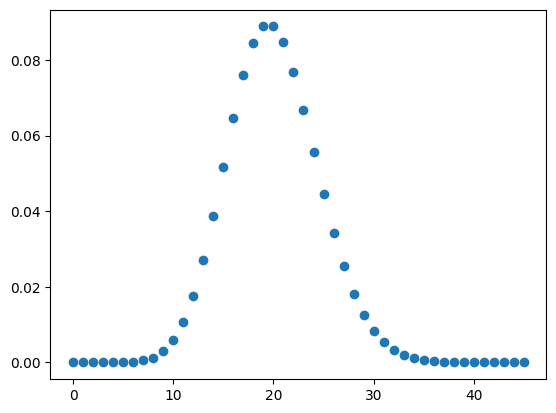

In [54]:
plt.scatter(df_experimento['nº pedidos'], df_experimento['probabilidade'] );

In [69]:
experimento = {
    'nº gols': [],
    'probabilidade': []
}

#----------------------------

l = 2.36
for i in range(15):
    experimento['nº gols'].append(i)
    experimento['probabilidade'].append(scipy.stats.poisson.pmf(k = i, mu = l))

#----------------------------
df_experimento = pd.DataFrame(experimento)
df_experimento['formatado'] = df_experimento['probabilidade'].apply(lambda x: f'{x:.9%}')
df_experimento['acumulada'] = df_experimento['probabilidade'].cumsum().apply(lambda x: f'{x:.9%}')
    
df_experimento

,nº gols,probabilidade,formatado,acumulada
0,0,9.442022e-02,9.442022320%,9.442022320%
1,1,2.228317e-01,22.283172674%,31.725194994%
2,2,2.629414e-01,26.294143756%,58.019338750%
3,3,2.068473e-01,20.684726421%,78.704065171%
4,4,1.220399e-01,12.203988588%,90.908053759%
5,5,5.760283e-02,5.760282614%,96.668336373%
6,6,2.265711e-02,2.265711161%,98.934047534%
7,7,7.638683e-03,0.763868334%,99.697915869%
8,8,2.253412e-03,0.225341159%,99.923257028%
9,9,5.908946e-04,0.059089459%,99.982346487%


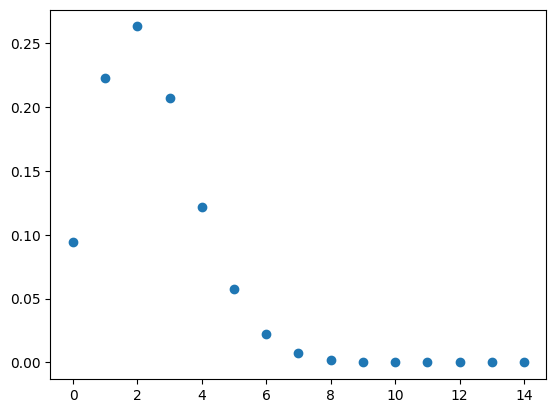

In [70]:
plt.scatter(df_experimento['nº gols'], df_experimento['probabilidade'])

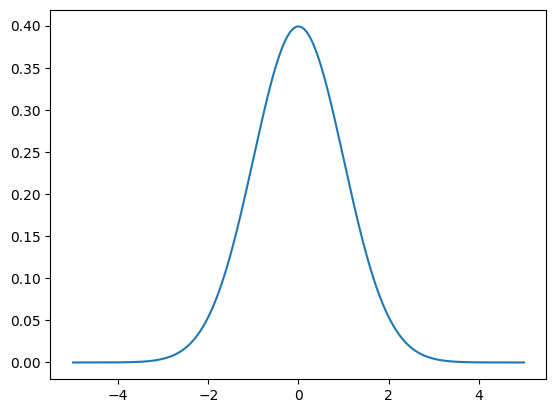

In [71]:
m, s = 0, 1

x = np.linspace(-5, 5, 100000)

y = (1/(s*np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x-m)/s) ** 2)

plt.plot(x,y);

<Axes: ylabel='Count'>

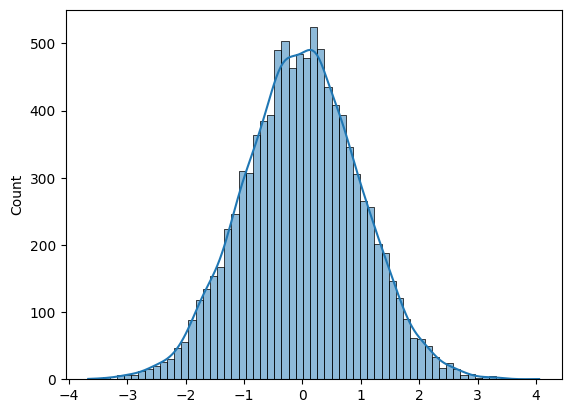

In [72]:
dados = np.random.normal(m,s,10000)
sns.histplot(data=dados, kde = True)

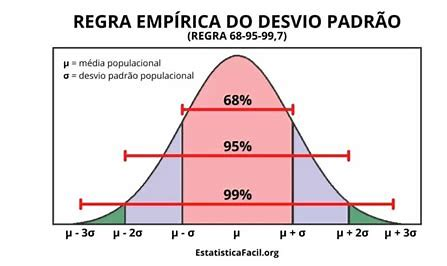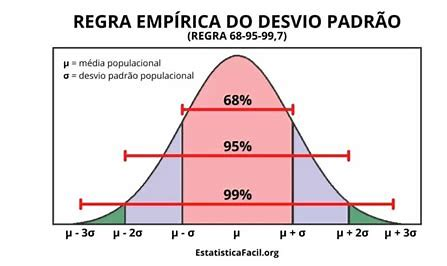

In [80]:
#Provando o que está acima
dados[np.abs(dados) <= 1].shape[0]/10000 # o

0.6873